# Mini projects

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
def imshow(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img[:,:,::-1])


4.png          n.png          notes.png      text.png
clean-text.jpg noisy.png      sketch.png


(408, 320)

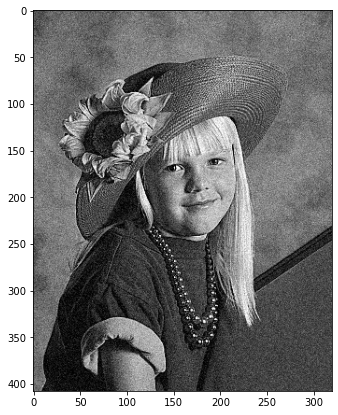

In [27]:
!ls img/
img = cv2.imread('img/noisy.png')
copy = img.copy()
#imshow(copy)
gray = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 7))
plt.imshow(gray, cmap='gray')

def create_sketch(img):
    

In [35]:
kernel = np.ones((5, 5), np.float32) / 25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

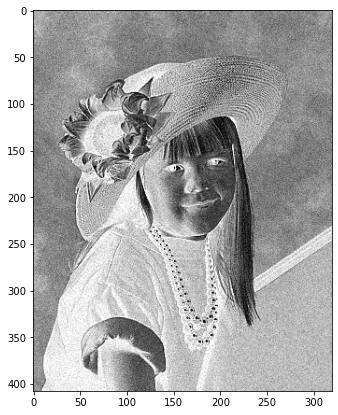

In [38]:
inv_img = cv2.bitwise_not(gray)
plt.figure(figsize=(10, 7))
plt.imshow(inv_img, cmap='gray')

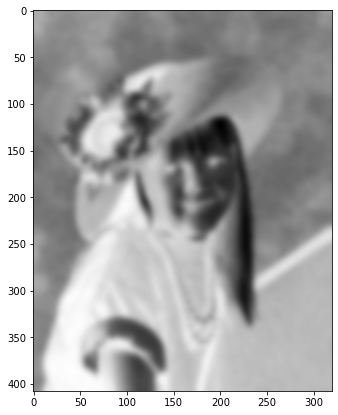

In [40]:
blur = cv2.GaussianBlur(inv_img, (21, 21), sigmaX=0, sigmaY=0)
plt.figure(figsize=(10, 7))
plt.imshow(blur, cmap='gray')

In [59]:
def dodgeV2(x, y):
    return cv2.divide(x, 255 - y, scale=256)

sketch = dodgeV2(gray, blur)
sketch = cv2.Canny(sketch, 700, 700)
_, sketch = cv2.threshold(sketch, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 7)
plt.imshow(sketch, cmap='gray')

SyntaxError: invalid syntax (<ipython-input-59-8e386b366dcc>, line 9)

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

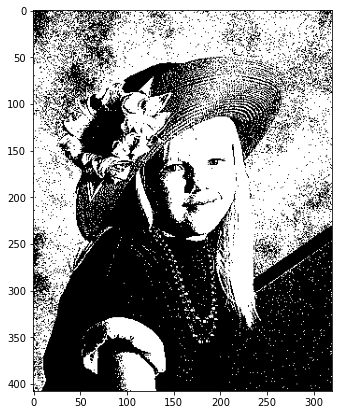

In [50]:
gcopy1 = gray.copy()

ret, thresh1 = cv2.threshold(gcopy1, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 7))
plt.imshow(thresh1, cmap='gray')

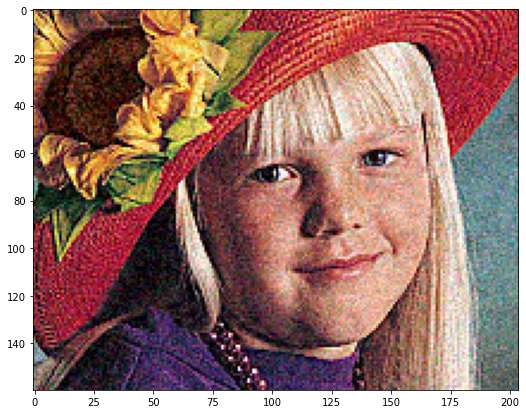

In [71]:
# image translation
t_img = img.copy()
height, width = t_img.shape[:2]
M = np.float32([[1, 0, -50], [0, 1, -100]])
dst_image = cv2.warpAffine(t_img, M, (height//2, width//2))
imshow(dst_image)

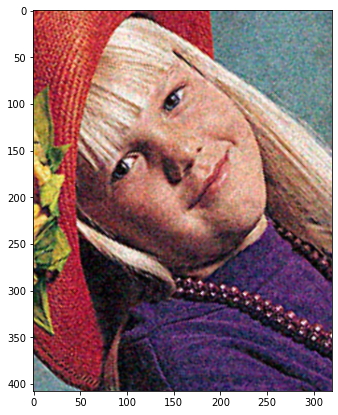

In [76]:
r_img = img.copy()
height, width = r_img.shape[:2]
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 45, 2)
dst2_image = cv2.warpAffine(r_img, M, (width, height))
imshow(dst2_image)

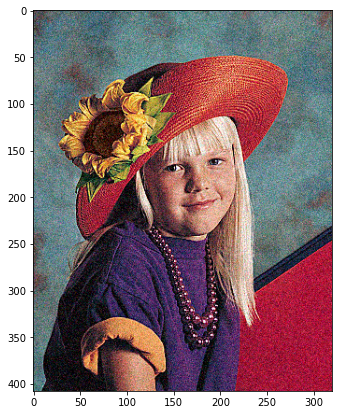

In [85]:
t_img = img.copy()
pts_1 = np.float32([[135, 45], [200, 45], [200, 230]])
pts_2 = np.float32([[135, 45], [200, 45], [200, 230]])
M = cv2.getAffineTransform(pts_1, pts_2)
dst3_image = cv2.warpAffine(t_img, M, (width, height))
imshow(dst3_image)

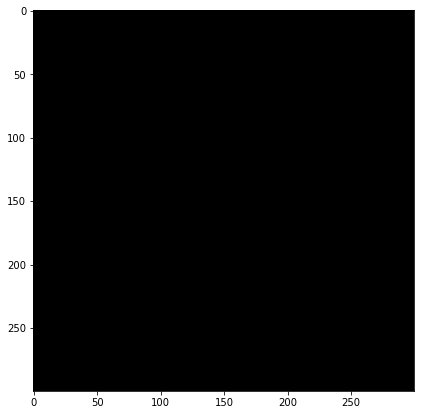

In [89]:
p_img = img.copy()
pts1 = np.float32([[450, 65], [517, 65], [431, 164], [552, 164]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(pts1, pts2)
dst4_image = cv2.warpPerspective(p_img, M, (300, 300))
imshow(dst4_image)

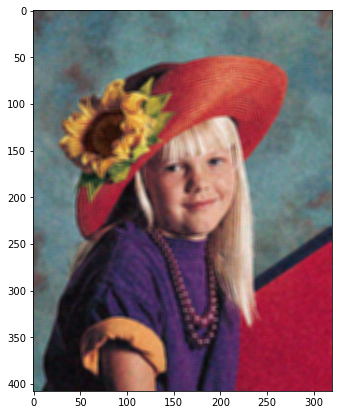

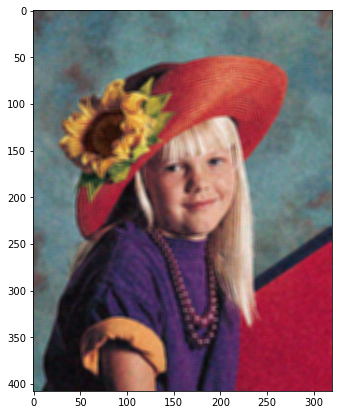

In [109]:
s_img = img.copy()
kernel = np.ones((5, 5), np.float32) / 25
smooth = cv2.filter2D(s_img, -1, kernel)
imshow(smooth)
b_img = img.copy()
b_img = cv2.boxFilter(b_img, -1, (5, 5), normalize=True)
imshow(b_img)

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits